# Критерии Стьюдента

In [6]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *

In [83]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Program Files\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Treatment effects of methylphenidate

В рамках исследования эффективности препарата метилфенидат 24 пациента с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к подавлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест.

Требуется оценить эффект применения препарата.

Pearson D.A, Santos C.W., Casat C.D., et al. (2004). Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD. Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.

In [3]:
data = pd.read_csv('ADHD.txt', sep = ' ', header = 0)
data.columns = ['Placebo', 'Methylphenidate']

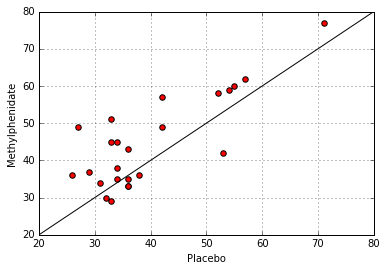

In [4]:
data.plot.scatter('Placebo', 'Methylphenidate', c = 'r', s = 30)
pylab.grid()
pylab.plot(range(100), c = 'black')
pylab.xlim((20, 80))
pylab.ylim((20, 80))
pylab.show()

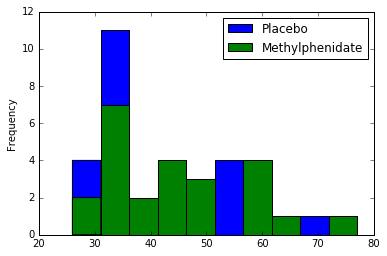

In [5]:
data.plot.hist()
pylab.show()

## Одновыборочный критерий Стьюдента

Исходя из того, что способность к подавлению испульсивных поведенческих реакций измеряется по шкале [0, 100], можно предположить, что при хорошей калибровке теста средняя способоность к подавлению реакций в популяции составляет 50. Тогда для того, чтобы проверить гипотезу о том, что пациенты в выборке действительно в среднем хуже справляются с подавлением импульсивных реакций (нуждаются в лечении), давайте проверим, что их способность к подавлению реакций отличается от средней (не равна 50). 

$H_0\colon$ среднее значение способности к подавлению испульсивных поведенческих реакций равно 50.

$H_1\colon$ не равно.

In [6]:
stats.ttest_1samp(data.Placebo, 50.0)

Ttest_1sampResult(statistic=-4.4380033419051284, pvalue=0.00018894293251080145)

In [7]:
print "95%% confidence interval: [%f, %f]" % zconfint(data.Placebo)

95% confidence interval: [35.223273, 44.276727]


## Двухвыборочный критерий Стьюдента (независимые выборки)

Для того, чтобы использовать двухвыборочный критерий Стьюдента, убедимся, что распределения в выборках существенно не отличаются от нормальных.

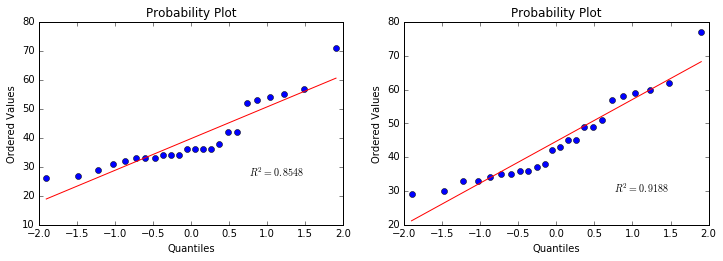

In [8]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(data.Placebo, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(data.Methylphenidate, dist="norm", plot=pylab)
pylab.show()

Критерий Шапиро-Уилка:

 $H_0\colon$ способности к подавлению импульсивных реакций распредлены нормально
 
 $H_1\colon$ не нормально.

In [9]:
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Placebo)

Shapiro-Wilk normality test, W-statistic: 0.857487, p-value: 0.003020


In [10]:
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate)

Shapiro-Wilk normality test, W-statistic: 0.916445, p-value: 0.048768


С помощью критерия Стьюдента проверим гипотезу о развенстве средних двух выборок.

Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_0\colon$ не одинаковы.

In [11]:
scipy.stats.ttest_ind(data.Placebo, data.Methylphenidate, equal_var = False)

Ttest_indResult(statistic=-1.4521635018159091, pvalue=0.15329199774047089)

In [14]:
cm = CompareMeans(DescrStatsW(data.Methylphenidate), DescrStatsW(data.Placebo))
print "95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal')

95% confidence interval: [-1.915927, 11.832593]


## Двухвыборочный критерий Стьюдента (зависмые выборки)

Для того, чтобы использовать критерй Стьюдента для связанных выборок, давайте проверим, что распределение попарных разностей существенно не отличается от нормального.

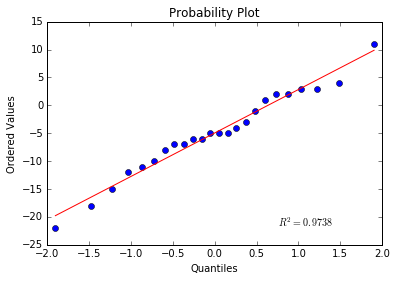

In [13]:
stats.probplot(data.Placebo - data.Methylphenidate, dist = "norm", plot = pylab)
pylab.show()

Критерий Шапиро-Уилка:

$H_0\colon$ попарные разности распределены нормально.

$H_1\colon$ не нормально.

In [14]:
print "Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(data.Methylphenidate - data.Placebo)

Shapiro-Wilk normality test, W-statistic: 0.979806, p-value: 0.892254


Критерий Стьюдента:

$H_0\colon$ средние значения способности к подавлению испульсивных поведенческих реакций одинаковы для пациентов, принимавших препарат, и для пациентов, принимавших плацебо.

$H_1\colon$ не одинаковы.

In [15]:
stats.ttest_rel(data.Methylphenidate, data.Placebo)

Ttest_relResult(statistic=3.2223624451230406, pvalue=0.003771488176381471)

In [1]:
print "95%% confidence interval: [%f, %f]" % DescrStatsW(data.Methylphenidate - data.Placebo).tconfint_mean()

SyntaxError: invalid syntax (<ipython-input-1-7fde1b1513da>, line 1)

In [36]:
import math
t = (9.57 - 9.5) / (0.4 / math.sqrt(160))

In [38]:
(1 - scipy.stats.norm(0,1).cdf(t)) * 2

0.026856695507523787

In [66]:
from sklearn import linear_model, cross_validation, ensemble

In [42]:
X = pd.read_csv('diamonds.txt', sep = '\t', header = 0)

In [55]:
train, test = cross_validation.train_test_split(X, random_state=1)

In [57]:
train.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [61]:
lrm = linear_model.LinearRegression()

In [62]:
lrm.fit(train[['carat', 'depth', 'table', 'x', 'y', 'z']], train['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
lrm_predictions = lrm.predict(test[['carat', 'depth', 'table', 'x', 'y', 'z']])

In [67]:
rfm = ensemble.RandomForestRegressor(random_state=1)

In [68]:
rfm.fit(train[['carat', 'depth', 'table', 'x', 'y', 'z']], train['price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

In [76]:
rfm_predictions = rfm.predict(test[['carat', 'depth', 'table', 'x', 'y', 'z']])

In [77]:
rfm_abs_diff = np.abs(rfm_predictions - test['price'])

In [73]:
lrm_abs_diff = np.abs(lrm_predictions - test['price'])

In [78]:
rfm_abs_diff.mean()

804.7028824753722

In [75]:
lrm_abs_diff.mean()

890.3764004285583

In [79]:
rfm_abs_diff.std()

1155.9556263189952

In [81]:
lrm_abs_diff.std()

1161.068461392602

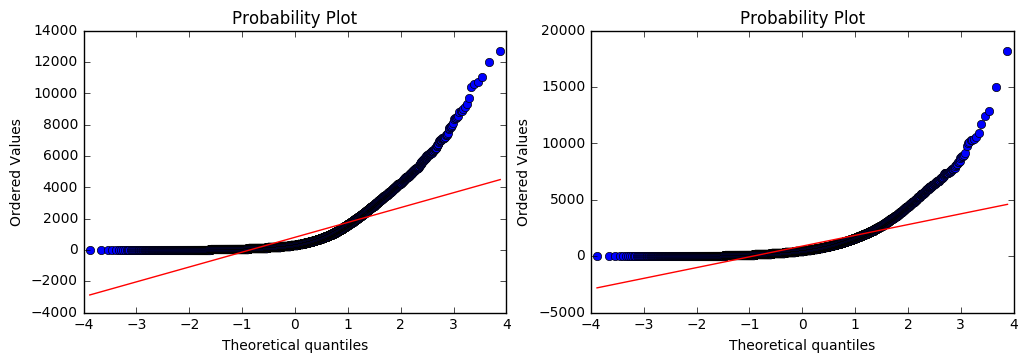

In [84]:
pylab.figure(figsize=(12,8))
pylab.subplot(2,2,1)
stats.probplot(rfm_abs_diff, dist="norm", plot=pylab)
pylab.subplot(2,2,2)
stats.probplot(lrm_abs_diff, dist="norm", plot=pylab)
pylab.show()

In [86]:
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % stats.shapiro(rfm_abs_diff))

Shapiro-Wilk normality test, W-statistic: 0.673387, p-value: 0.000000


C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1330: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [91]:
scipy.stats.ttest_rel(rfm_abs_diff, lrm_abs_diff)

Ttest_relResult(statistic=-12.745056775182134, pvalue=5.428654818173066e-37)

In [89]:
cm = CompareMeans(DescrStatsW(rfm_abs_diff), DescrStatsW(lrm_abs_diff))
print("95%% confidence interval: [%f, %f]" % cm.tconfint_diff(usevar='unequal'))

95% confidence interval: [-113.327566, -58.019470]


In [92]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(rfm_abs_diff - lrm_abs_diff).tconfint_mean())

95% confidence interval: [-98.849770, -72.497266]
